In [171]:
#Assignment2
#Oppgave: Predict stock market price for tesla:

In [800]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns


In [801]:
url = "https://raw.githubusercontent.com/Thealpet/Assignment2AI/main/TSLA.csv"

df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
1,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
3,2020-10-22,441.920013,445.230011,424.510010,425.790009,425.790009,39993200
4,2020-10-23,421.839996,422.890015,407.380005,420.630005,420.630005,33717000


In [802]:
#Gjør om dato til nummer
df["Date"] = pd.to_datetime(df["Date"])
df["Date"] = df["Date"].apply(lambda x: x.toordinal())

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,737717,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
1,737718,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2,737719,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
3,737720,441.920013,445.230011,424.510010,425.790009,425.790009,39993200
4,737721,421.839996,422.890015,407.380005,420.630005,420.630005,33717000


In [803]:
# Trekker ut Date og Close(pris) fra datasettet
X = pd.DataFrame(df['Date']) 
y = pd.DataFrame(df['Close']) 

In [804]:
#Lager sett for trening og testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [805]:
#linear regression og prediction
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_train)

In [806]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

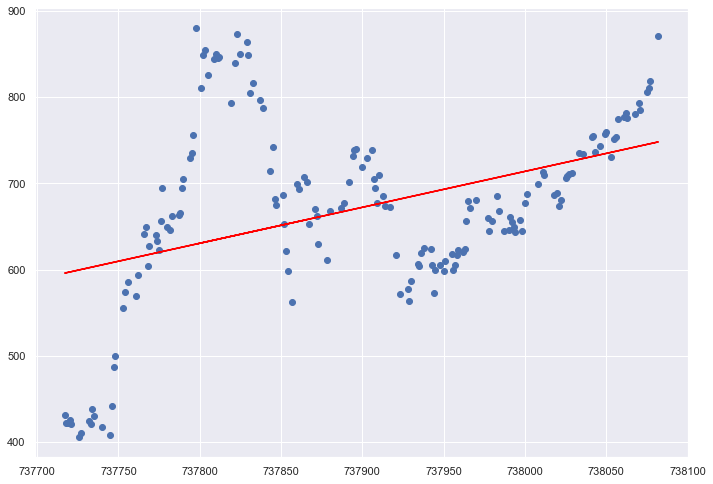

MSE = 9739.051006918291


In [807]:
#train
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

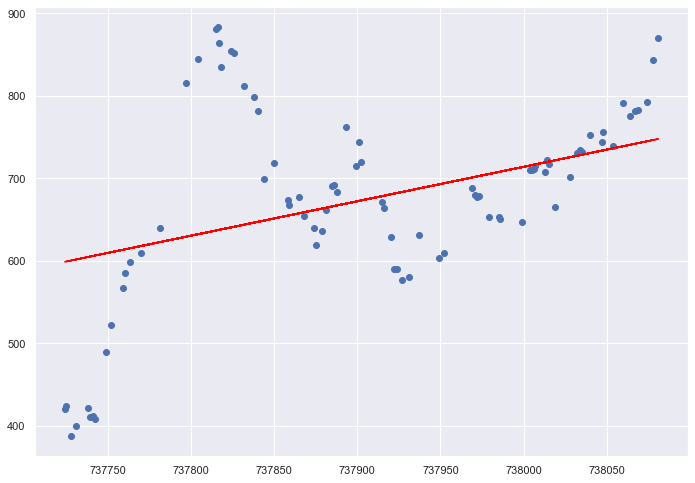

MSE = 10914.675428029372


In [808]:
#test
Y_pred = linear_regressor.predict(X_test)  
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

In [809]:
#Metode for å få ut predicted pris:
Y_pred = linear_regressor.predict(X_train) 

def predictPrice(date):
    date1 = datetime.strptime(date, '%Y-%m-%d')#Gjør først om input-dato til nummer
    date2 = date1.toordinal()
    
    pred = linear_regressor.predict([[date2]]) 
    print(f"Predicted price: {pred[0][0]}")
    print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))
    
    

In [810]:
#Skriver inn valgfri dato, og får ut pris og MSE
predictPrice("2021-10-19") 

Predicted price: 748.1157678454183
MSE = 9739.051006918291
